# WeatherPy

---

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [151]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [152]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
        weather_response = requests.get(query_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | svetlyy
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | ain sefra
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | shimoda
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | kiruna
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | deqen
Processing Record 17 of Set 1 | merizo village
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | yajiwa
Processing Record 22 of Set 1 | puerto ayora
City not found. 

In [153]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [155]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,19.19,93,88,1.53,US,1686538683
1,vilyuchinsk,52.9306,158.4028,23.15,52,84,1.34,RU,1686538683
2,olonkinbyen,70.9221,-8.7187,0.92,98,100,5.20,SJ,1686538683
3,svetlyy,54.6750,20.1347,11.65,71,5,3.91,RU,1686538684
4,waitangi,-43.9535,-176.5597,12.68,88,100,0.45,NZ,1686538684


In [156]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [157]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,19.19,93,88,1.53,US,1686538683
1,vilyuchinsk,52.9306,158.4028,23.15,52,84,1.34,RU,1686538683
2,olonkinbyen,70.9221,-8.7187,0.92,98,100,5.20,SJ,1686538683
3,svetlyy,54.6750,20.1347,11.65,71,5,3.91,RU,1686538684
4,waitangi,-43.9535,-176.5597,12.68,88,100,0.45,NZ,1686538684


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

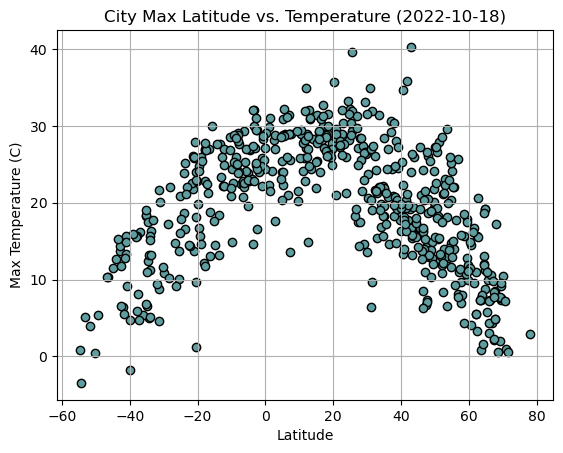

In [159]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

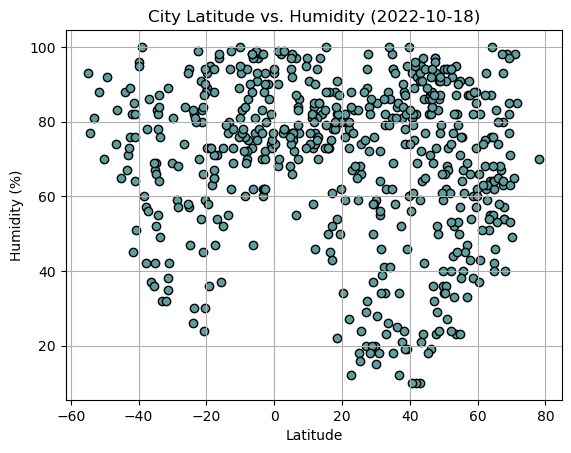

In [160]:
# Build scatter plot for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

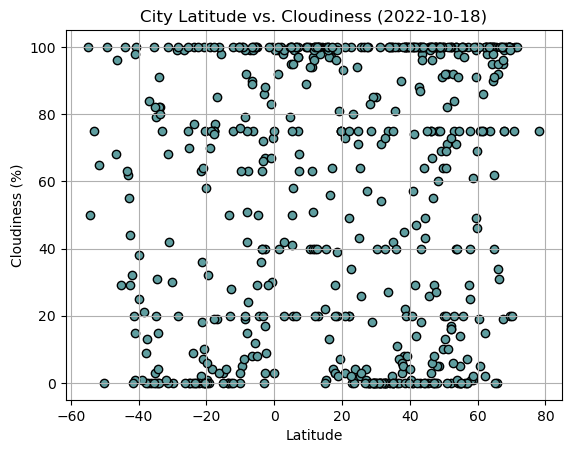

In [161]:
# Build scatter plot for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

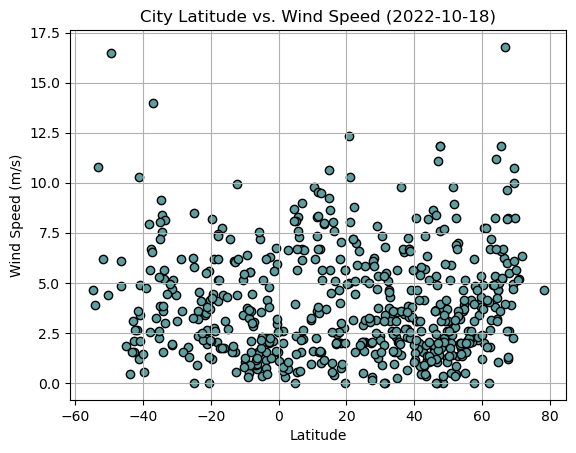

In [162]:
# Build scatter plot for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [163]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,19.19,93,88,1.53,US,1686538683
1,vilyuchinsk,52.9306,158.4028,23.15,52,84,1.34,RU,1686538683
2,olonkinbyen,70.9221,-8.7187,0.92,98,100,5.20,SJ,1686538683
3,svetlyy,54.6750,20.1347,11.65,71,5,3.91,RU,1686538684
5,whitehorse,60.7161,-135.0538,14.45,43,75,7.72,CA,1686538531


In [164]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,waitangi,-43.9535,-176.5597,12.68,88,100,0.45,NZ,1686538684
6,bredasdorp,-34.5322,20.0403,12.43,83,31,7.54,ZA,1686538684
10,touros,-5.1989,-35.4608,23.92,91,29,3.56,BR,1686538685
12,hermanus,-34.4187,19.2345,13.22,82,15,8.39,ZA,1686538686
14,puerto natales,-51.7236,-72.4875,3.94,88,65,6.20,CL,1686538686


###  Temperature vs. Latitude Linear Regression Plot

The r-squared-value is 0.547324258736876


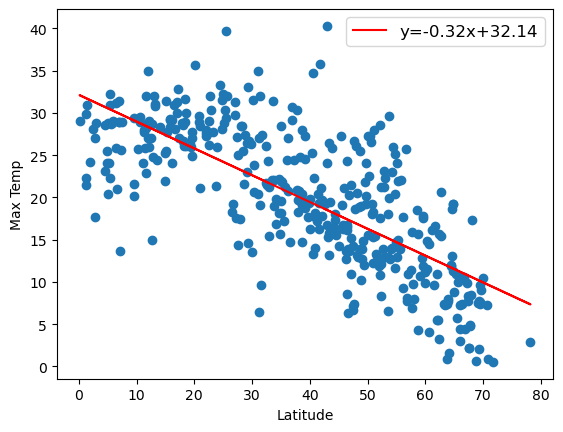

In [169]:
# Northern Hemisphere

# Calculate the correlation coefficient and a linear regression model
x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.6169287342791883


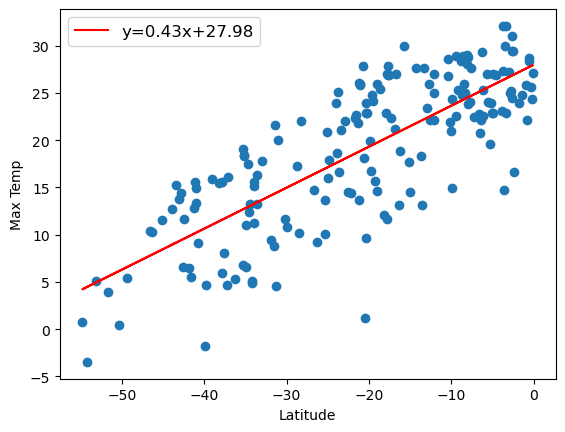

In [170]:
# Southern Hemisphere

# Calculate the correlation coefficient and a linear regression model
x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared-value is 0.015802896283621266


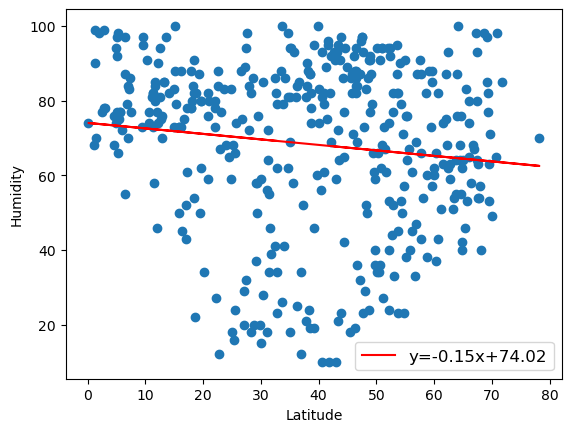

In [172]:
# Northern Hemisphere

# Calculate the correlation coefficient and a linear regression model
x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.03793729976281654


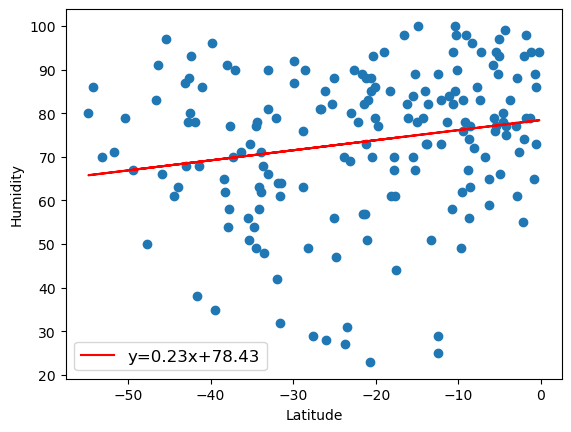

In [138]:
# Southern Hemisphere

x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared-value is 0.000208049635704179


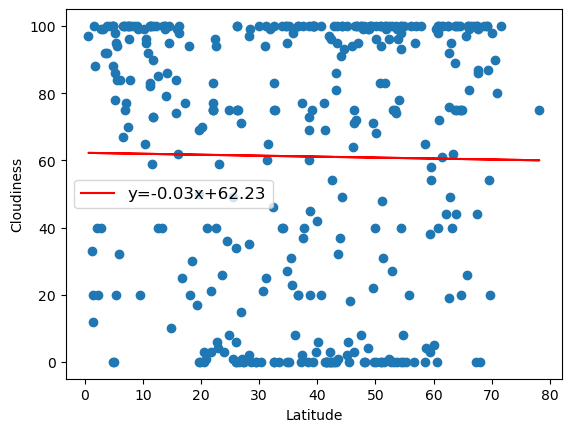

In [139]:
# Northern Hemisphere

x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.006076011887835564


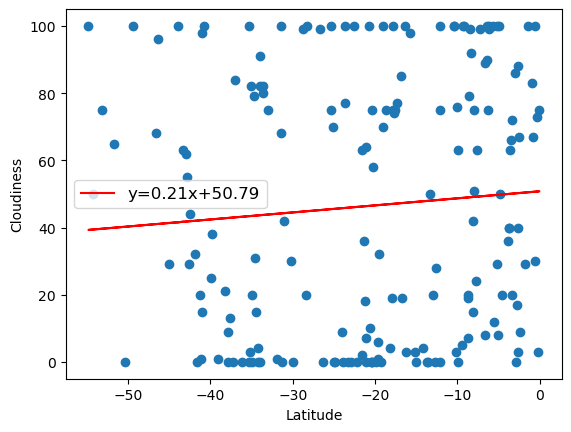

In [173]:
# Southern Hemisphere

x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared-value is 0.000881331162723917


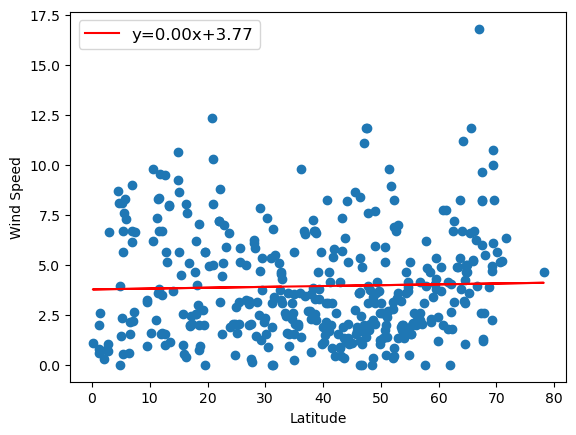

In [174]:
# Northern Hemisphere

x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

## slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.07281443088806558


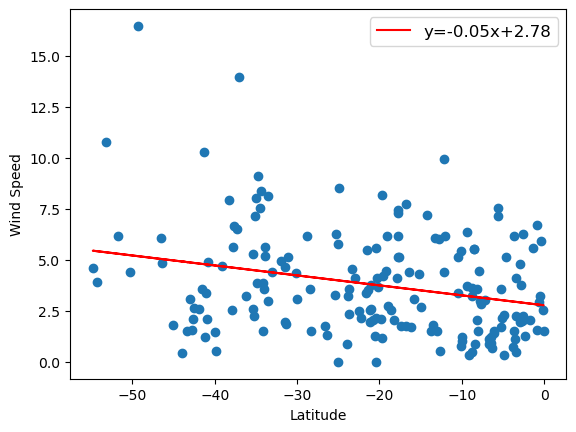

In [175]:
# Southern Hemishpere

x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

## slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE